In [57]:
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn.ensemble as se
import csv

In [58]:
train = pd.read_csv('train.csv')
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,21576.500000,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,12457.631095,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.250000,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,32364.750000,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,43153.000000,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


# 1 Data Handling

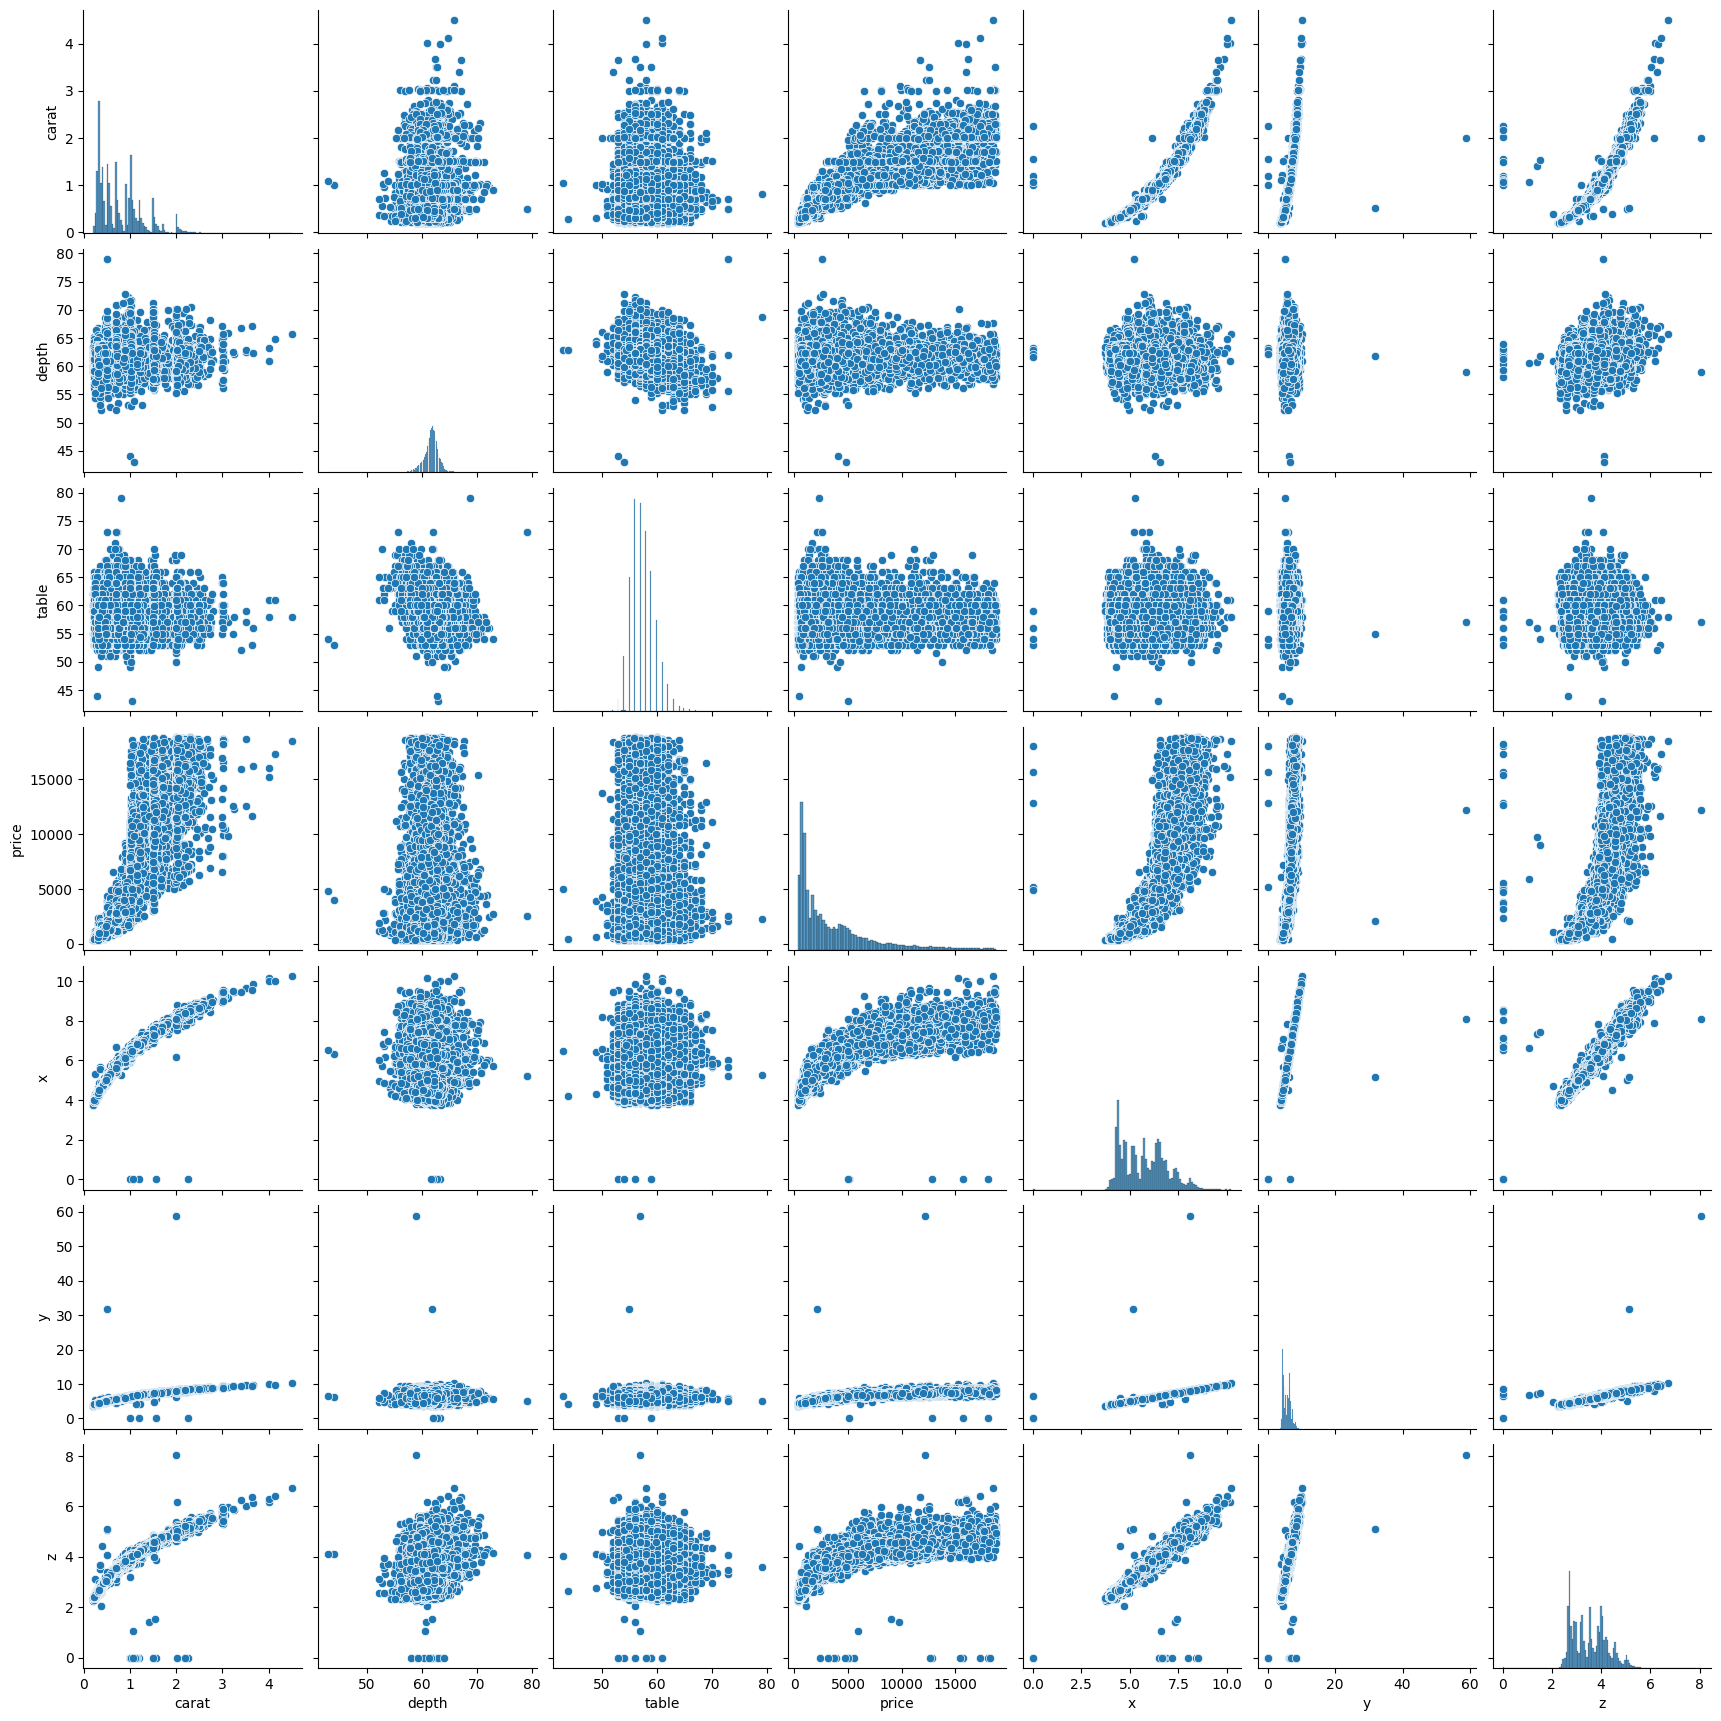

In [59]:
train = train.drop(["Unnamed: 0"], axis=1)
sn.pairplot(train)

We see that there are lots of outliers, and specifically for x, y and z, we see zero value which is not logical.

In [60]:
train = train.drop(train[(train["x"]==0) | (train["y"]==0) | (train["z"]==0)].index)


In [61]:
train.describe()

,carat,depth,table,price,x,y,z
count,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000
mean,0.798795,61.743117,57.458925,3944.841764,5.734061,5.737700,3.540650
std,0.475025,1.428249,2.227093,3996.466320,1.121156,1.148875,0.692987
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,952.250000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2405.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5366.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


Now remove the outliers.

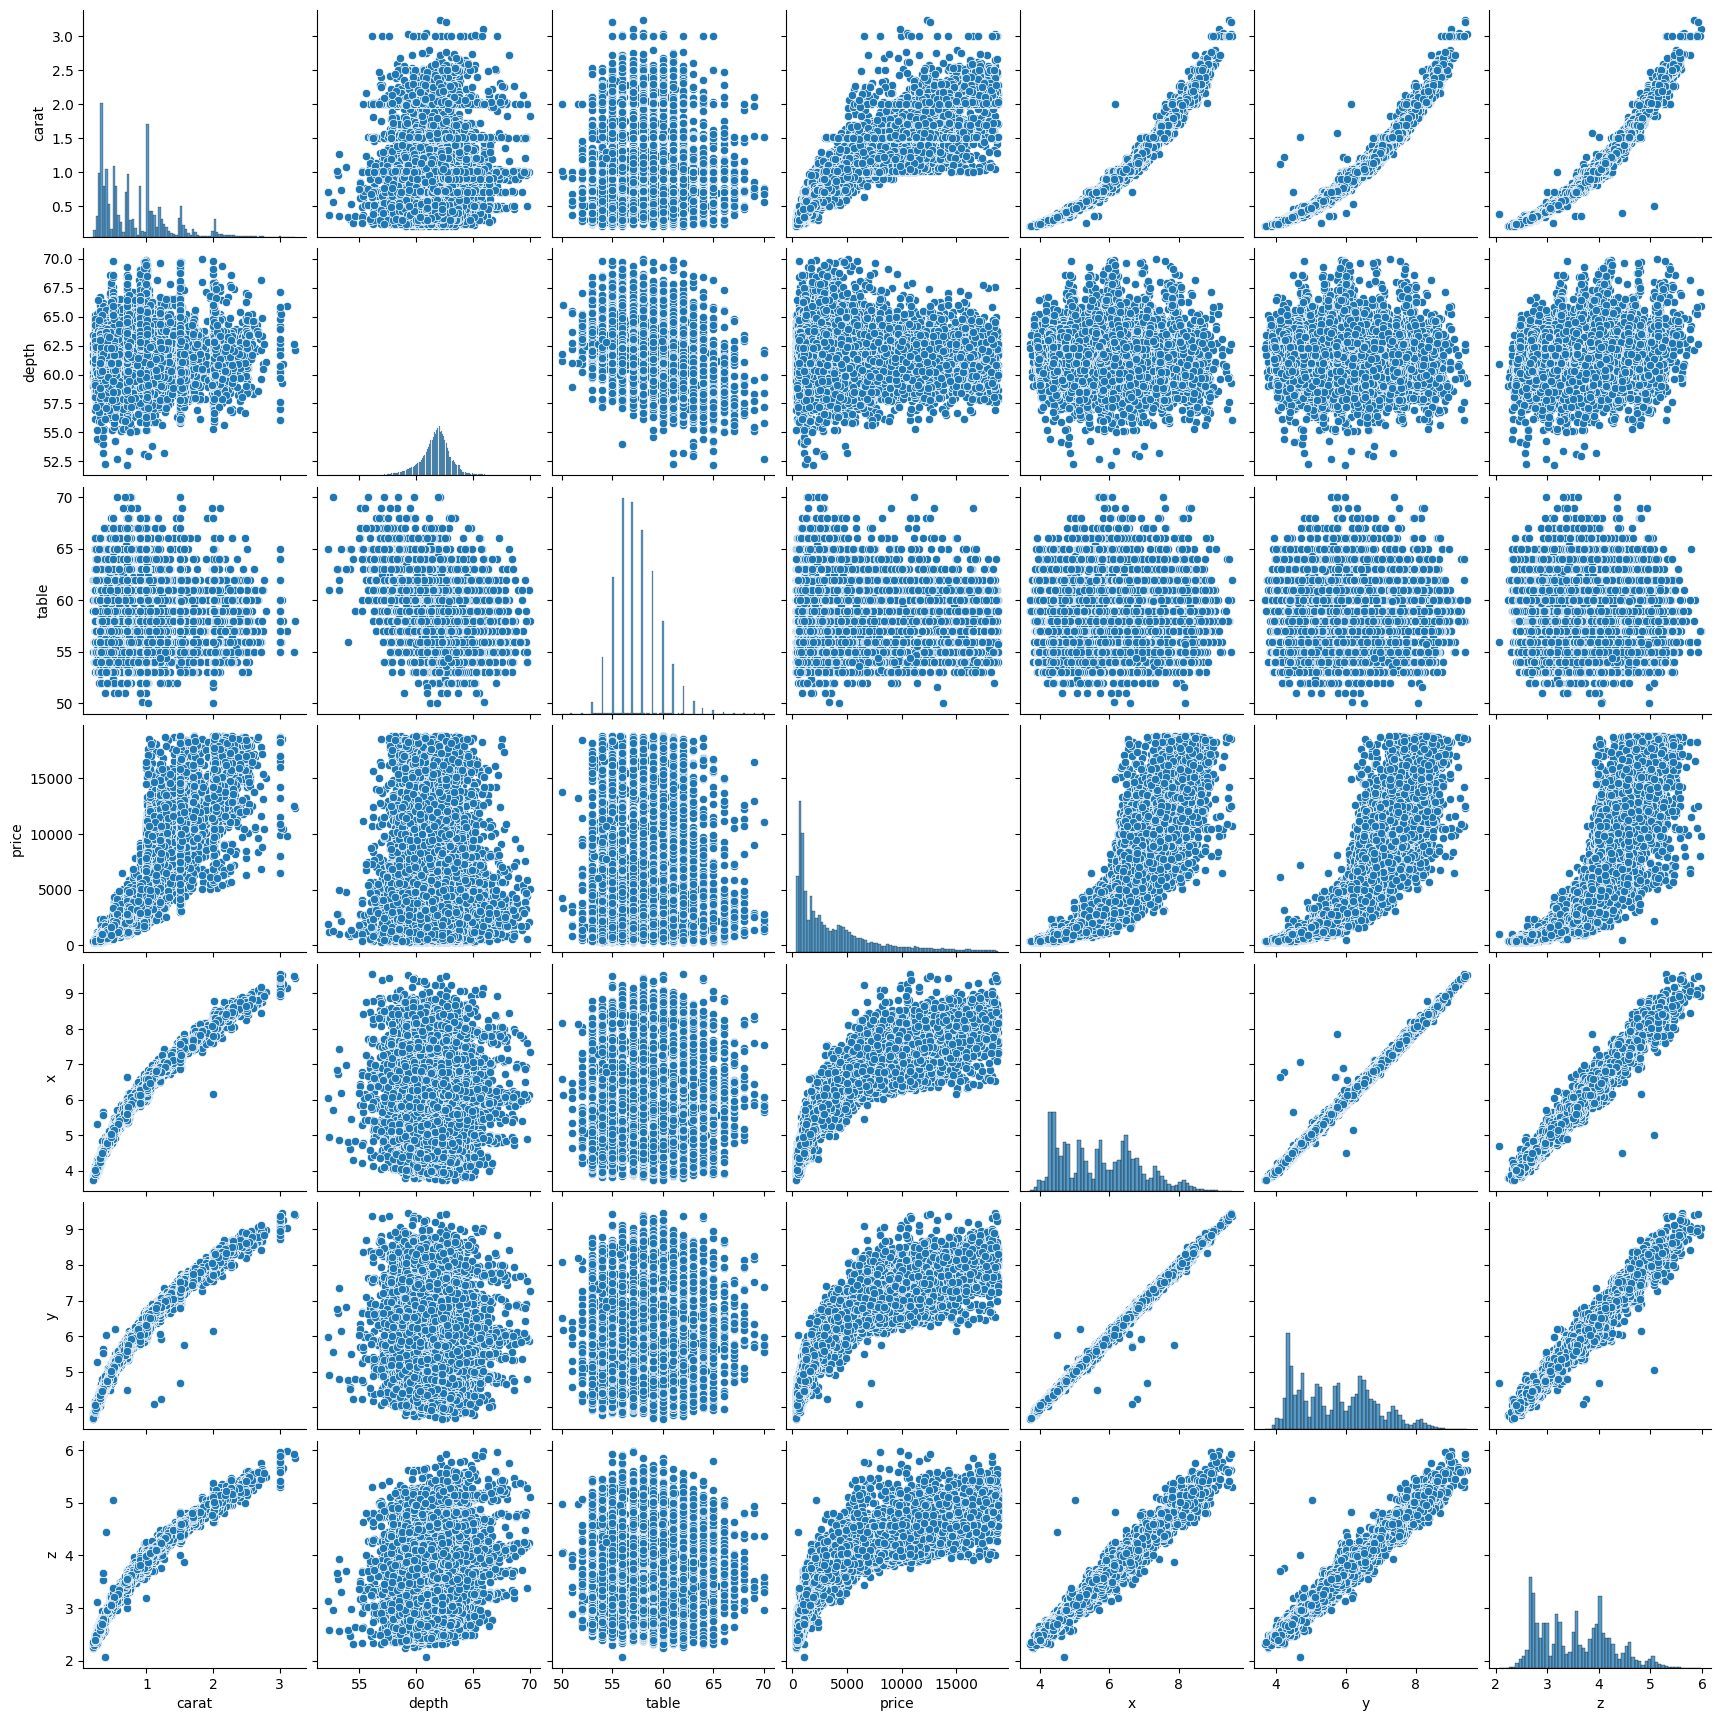

In [62]:
train = train.drop(train[(train["carat"]>3.5) | ((train["depth"]<50) | (train["depth"]>70)) | ((train["table"]<50) | (train["table"]>70))\
    | (train["x"]>10) | (train["y"]>20) | ((train["z"]<2) | (train["z"]>6))].index)
sn.pairplot(train)

Now we have a well-trimmed dataset.

# 2 Ordinal Encoding for Categorical Variables

In [63]:
train["totdep"] = 2 * train.z/(train.y + train.x)
train = train.drop(["x", "y", "z"], axis=1)

scale_mapper = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
train["cut"] = train["cut"].replace(scale_mapper)

scale_mapper = {"D":7, 'E':6, "F":5, "G":4, "H":3, "I":2, "J":1}
train["color"] = train["color"].replace(scale_mapper)

scale_mapper = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}
train["clarity"] = train["clarity"].replace(scale_mapper)

train.describe()


,carat,cut,color,clarity,depth,table,price,totdep
count,43096.000000,43096.000000,43096.000000,43096.000000,43096.000000,43096.000000,43096.000000,43096.000000
mean,0.797921,3.906882,4.407741,4.057151,61.739384,57.458606,3941.815969,0.617412
std,0.472894,1.113339,1.701955,1.643858,1.406225,2.216004,3993.169954,0.014325
min,0.200000,1.000000,1.000000,1.000000,52.200000,50.000000,326.000000,0.438765
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,952.000000,0.610402
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2403.000000,0.618349
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5363.250000,0.625147
max,3.240000,5.000000,7.000000,8.000000,70.000000,70.000000,18823.000000,1.006965


# 3 Random Forest Model

In [64]:
X = train.drop(["price"], axis = 1)
Y = train["price"]

forest = se.RandomForestRegressor(n_estimators=500)
forest.fit(X, Y)

RandomForestRegressor(n_estimators=500)

# 4 Introduce the Testing Set

In [65]:
test = pd.read_csv('test.csv')
test.describe()

,id,carat,depth,table,x,y,z
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,5394.000000,0.793487,61.774910,57.450218,5.720597,5.722336,3.536297
std,3114.660361,0.469100,1.449154,2.263829,1.116605,1.108576,0.742402
min,0.000000,0.200000,43.000000,51.000000,0.000000,0.000000,0.000000
25%,2697.000000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,5394.000000,0.700000,61.900000,57.000000,5.690000,5.710000,3.520000
75%,8091.000000,1.040000,62.600000,59.000000,6.520000,6.520000,4.030000
max,10788.000000,5.010000,78.200000,95.000000,10.740000,10.540000,31.800000


In [66]:
test = test.drop(["id"], axis=1)
test['totdep'] = np.where(test["y"]+test["x"]==0, 0, 2*test["z"]/(test["x"]+test["y"]))
test = test.drop(["x", "y", "z"], axis=1)

scale_mapper = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
test["cut"] = test["cut"].replace(scale_mapper)

scale_mapper = {"D":7, 'E':6, "F":5, "G":4, "H":3, "I":2, "J":1}
test["color"] = test["color"].replace(scale_mapper)

scale_mapper = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}
test["clarity"] = test["clarity"].replace(scale_mapper)


# 5 Price Prediction

In [67]:
df = pd.DataFrame({"price": forest.predict(test)})
df.head()
path=r"C:\Users\wlinl\Desktop\U of T\MMF 1922 Data Science\ "
df.to_csv(path+"Liam_Submission.csv")